In [1]:
# Importing the modules
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Getting the list of csv

In [2]:
glob('dataset/*.csv')

['dataset\\dengue_features_test.csv',
 'dataset\\dengue_features_train.csv',
 'dataset\\dengue_labels_train.csv']

### Reading the Dataset

In [3]:
dengue_features = pd.read_csv('dataset\\dengue_features_train.csv')
dengue_labels = pd.read_csv('dataset\\dengue_labels_train.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue Features' + '{:>11} {:>8}'.format(dengue_features.shape[0], dengue_features.shape[1]))

print('Dengue Labels' + '{:>13} {:>8}'.format(dengue_labels.shape[0], dengue_labels.shape[1]))

                      Rows     Columns
Dengue Features       1456       24
Dengue Labels         1456        4


In [4]:
dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
dengue_features.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [6]:
dengue_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### Finding the year that has maximum cases of dengue

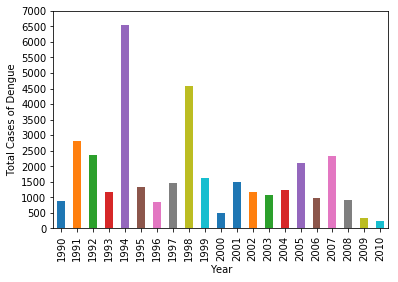

In [7]:
year_max_cases = dengue_labels.groupby(['year'])['total_cases'].agg('sum')

#Visualizing it
year_max_cases.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.yticks(np.arange(0,7500, step=500))
plt.show()

So, Year 1994 faced maximum cases of dengue

### City that has maximum cases of dengue

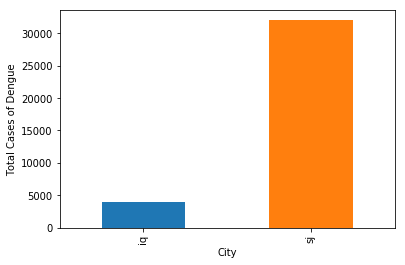

In [8]:
city_affected = dengue_labels.groupby(['city'])['total_cases'].agg('sum')

city_affected.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Cases of Dengue')
plt.show()

## Data Preprocessing

### 1. Checking the null entries

In [9]:
dengue_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [10]:
dengue_features[dengue_features['ndvi_ne'].isna()]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1
13,sj,1990,31,1990-07-30,NaN,0.247150,0.379700,0.381357,32.66,299.862857,...,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6
14,sj,1990,32,1990-08-06,NaN,0.064333,0.164443,0.138857,28.80,300.391429,...,20.00,79.650000,28.80,17.950000,2.328571,28.200000,7.557143,33.3,23.3,11.4
15,sj,1990,33,1990-08-13,NaN,0.128033,0.206957,0.168243,90.75,299.958571,...,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7
24,sj,1990,42,1990-10-15,NaN,0.070200,0.181617,0.165750,143.55,299.195714,...,279.60,85.621429,143.55,18.115714,1.871429,27.628571,7.400000,32.8,23.3,61.8
36,sj,1991,2,1991-01-08,NaN,0.100467,0.251900,0.137617,15.85,297.674286,...,26.33,76.628571,15.85,14.671429,1.885714,24.914286,6.314286,28.3,21.1,31.7
37,sj,1991,3,1991-01-15,NaN,0.293567,0.259943,0.217900,0.00,297.422857,...,27.40,78.500000,0.00,14.798571,2.000000,25.242857,6.571429,29.4,21.1,16.5
42,sj,1991,8,1991-02-19,NaN,0.209400,0.108433,0.119400,0.00,297.414286,...,26.20,79.740000,0.00,15.035714,2.571429,25.842857,8.471429,32.2,20.0,17.8
45,sj,1991,11,1991-03-12,NaN,NaN,0.213250,0.240543,0.00,297.431429,...,13.37,78.138571,0.00,14.787143,2.728571,25.928571,8.971429,31.7,20.6,3.6


In [11]:
x = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()
x

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [13]:
for i in x:
    dengue_features[i] = dengue_features[i].fillna(dengue_features[i].mean())

#### Converting all the temperatures from Kelvin to Centigrade

In [15]:
temperature_kelvin_columns = [i for i in dengue_features.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k']

In [16]:
for i in temperature_kelvin_columns:
    dengue_features[i] = dengue_features[i] - 273.15

dengue_features['reanalysis_air_temp_k'].head()

0    24.422857
1    25.061429
2    25.631429
3    25.837143
4    26.368571
Name: reanalysis_air_temp_k, dtype: float64

In [17]:
# Changing the column names from _temp_k to _temp_c
dengue_features.columns = [i.replace('_temp_k', '_temp_c') for i in dengue_features.columns if i.find('_temp_k')]

### Rounding every value upto 3 decimal places

In [18]:
dengue_features = dengue_features.round(3)

dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.123,0.104,0.198,0.178,12.42,24.423,...,32.00,73.366,12.42,14.013,2.629,25.443,6.900,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.170,0.142,0.162,0.155,22.82,25.061,...,17.94,77.369,22.82,15.373,2.371,26.714,6.371,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032,0.173,0.157,0.171,34.54,25.631,...,26.10,82.053,34.54,16.849,2.300,26.714,6.486,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.129,0.245,0.228,0.236,15.36,25.837,...,13.90,80.337,15.36,16.673,2.429,27.471,6.771,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196,0.262,0.251,0.247,7.52,26.369,...,12.20,80.460,7.52,17.210,3.014,28.943,9.371,35.0,23.9,5.8
